###  This jupyter file is using for analysis so, all needed methods from BCI interface, No one should write any function existing in BCI interface, if you need new feature write it in BCI interface for relavinte topic then import and use it, this file is using for logic and analysis **ONLY**.

### Import All Needed Class

In [1]:
from BCInterface.Helpers import helper
from BCInterface.Visualization.Visualization import graphs
from BCInterface.Preprocessing.DataPrepare import DataPrepare
from BCInterface.Preprocessing.files_manager import Filesmanager
from mainproccess import Process

import glob

### Some users configuations and files, trails, etc...

In [420]:
number_sec = 5           # sellect example time
path_dir_ = 'D:/Graduation Project/EEG-SSVEP-DataSet/5_S/'
File_regexp = 'U0000[w]*.csv' #'U0000[s|t|u|v|w]*.csv'

### Get Data from files, and prepare it.

In [421]:
prepare = DataPrepare()
data = prepare.get_dataFromFiles(glob.glob(path_dir_ + File_regexp),concate=True) # data from all files

# Frequency required

In [422]:
frequency = [10]  # select freq 


data_coca = prepare.Concate_frequanceis(data, FreqS = frequency) # data with freq
Labels = data_coca['Label'] #.drop('Label',axis=1)
Labels

0       10.0
1       10.0
2       10.0
3       10.0
4       10.0
        ... 
3835    10.0
3836    10.0
3837    10.0
3838    10.0
3839    10.0
Name: Label, Length: 3840, dtype: float64

### Time Domain Visualization, before CAR

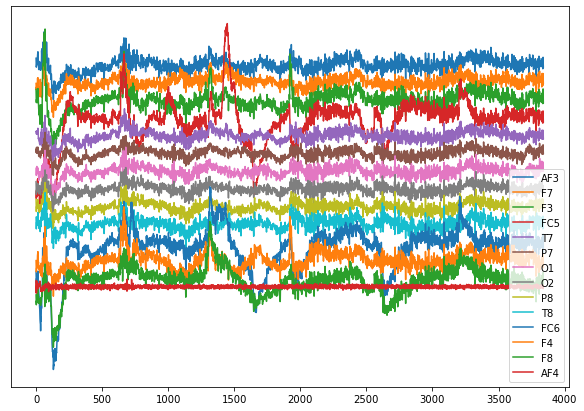

In [423]:
graphs.time_vis(data_coca.copy())

### Calcualte CAR 

In [424]:
data_car = helper.CAR(data_coca.copy())  # CAR on data
# trials_list_after_CAR = prepare.Extraxt_trials(data_car, number_sec)
# freq, power = helper.welch(data_car.copy(),False, True)

### Time Domain Visualization, after CAR

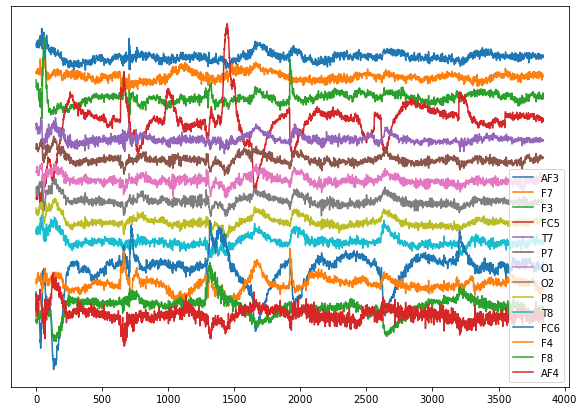

In [425]:
graphs.time_vis(data_car.copy())

### BandPass filter with freq response.

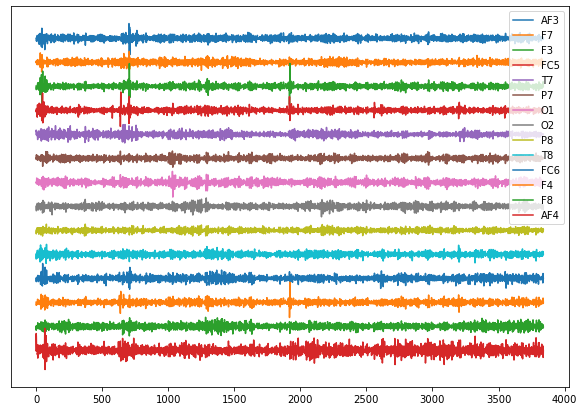

In [426]:
data_filter = helper.butter_band_filter(data_car.copy(),7, 40)
# trials_list_after_filter = prepare.Extraxt_trials(data_filter, number_sec)
graphs.time_vis(data_filter.copy())

### Power using welch.

In [427]:
freq, power, lable = helper.welch(data_filter,True, True)

### Power vs. Frequency visualization

len of f 14


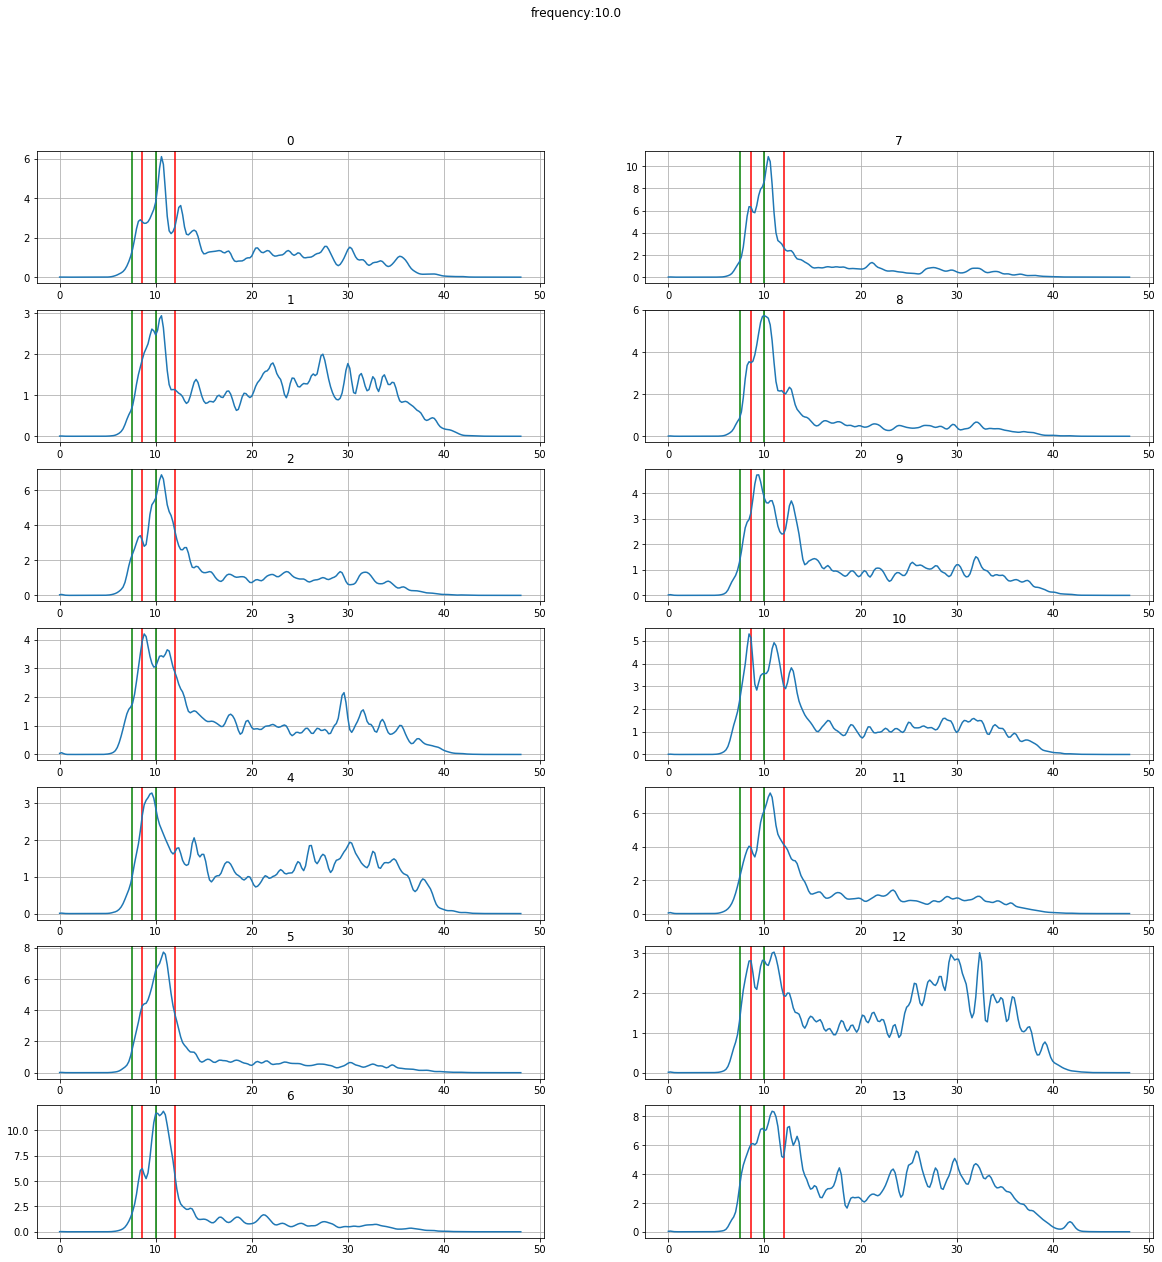

In [428]:
graphs.welch_vis(freq, power,lable,[0,1,2,3,4,5,6,7,8,9,10,11,12,13])

### Extract Features 

### Prepare data for train

In [391]:
prepare =  DataPrepare()
data = prepare.get_dataFromFiles(['D:/Graduation Project/EEG-SSVEP-DataSet/5_S/U0000ri.csv'], concate=True)

### Train

In [392]:
process = Process()
process.train(data)

ValueError: n_components=35 must be between 0 and min(n_samples, n_features)=8 with svd_solver='full'

### Predict

### All needed modules can import or use it as you want.